# **Lead Scoring Case Study**

## Step 1 - Importing & Understanding Data

In [40]:
# basic library imports

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# reading dataset

csv_file_path = (r"C:\Users\Anshu\Lead Scoring Case Study\Leads.csv")

xleads = pd.read_csv(csv_file_path)

In [42]:
# Look at the first few entries
xleads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [43]:
# checking for duplicates

xleads.duplicated().sum()

0

In [44]:
# Inspect the shape of the dataset
xleads.shape

(9240, 37)

The original dataset has 9240 rows and 37 columns.

In [45]:
# Inspect the different columsn in the dataset
xleads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [46]:
# checking data types of columns
xleads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [47]:
# checking nulls in columns
xleads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [48]:
# checking summary of all num columns to better understand the data
xleads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


**Insights:**

1. There are no duplicates
2. There are a lot of nulls to be handled
3. There could be some outliers (looking as the output of describe())

## Step 2 - Data Cleaning

In [49]:
# checking the count of word 'Select' in each column (to handle as mentioned in the problem statement)

xleads.isin(['Select']).sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                   1942
How did you hear about X Education               5043
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article           

In [50]:
# replacing Select with null

xleads = xleads.replace('Select', np.nan)

In [51]:
# verifying if 'Select' is properly handled

xleads.isin(['Select']).sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [52]:
# checking missing values %

xleads.isnull().mean().sort_values(ascending=False) * 100

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [54]:
# checking columns with > 40% missing values

x_null = xleads.isnull().mean().sort_values(ascending=False) * 100
columns_to_drop = x_null[x_null >= 40].index.to_list()
columns_to_drop

['How did you hear about X Education',
 'Lead Profile',
 'Lead Quality',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index']

In [55]:
# droping columns with >40% missing values

xleads.drop(labels=columns_to_drop, axis=1, inplace=True)

In [56]:
xleads.shape

(9240, 30)

From 37 columns the dataset has been reduced to 30 columns

In [57]:
# verifying nulls

x_null = xleads.isnull().mean().sort_values(ascending=False) * 100
x_null

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

In [58]:
# checking what to be done for cols with >25% missing values

columns_to_check = x_null[x_null >= 25].index.to_list()
columns_to_check

['City',
 'Specialization',
 'Tags',
 'What matters most to you in choosing a course',
 'What is your current occupation',
 'Country']

In [59]:
# checking value counts

for cols in columns_to_check:
        count = xleads[cols].value_counts(normalize=True) * 100
        print("value_counts for :",cols,"\n")
        print(count,"\n")
        print("----------------------------------------------------------------------------------","\n")

value_counts for : City 

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64 

---------------------------------------------------------------------------------- 

value_counts for : Specialization 

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Ma

**Note:**

1. The City column exhibits 39% null values, and with 54% of the remaining entries being Mumbai, imputing Mumbai for the nulls could introduce bias to the model. Consequently, the decision is made to drop the City column.

2. The Tags column appears to be manually updated by the sales team post each communication, but its relevance to the model is questionable. Consequently, the Tags column is deemed unnecessary and will be dropped.

3. "Better Career Prospects" is overwhelmingly prevalent (99%) in responses to the query "What matters most to you in choosing a course." Given the near-uniformity of this response, the column is considered redundant and will be removed.

4. The Country column reveals that 95% of leads are from India, raising concerns about potential bias in the model. To address this, the decision is made to drop the Country column.

5. Specialization shows a diverse distribution across various categories, allowing for the assignment of "Others" to fill in missing values.

6. Similarly, for the Occupation column, missing values can be reasonably imputed with "Unemployed/Others."

In [60]:
# dropping columns as mentioned above

columns_to_drop = ['City', 'Tags', 'What matters most to you in choosing a course', 'Country']
xleads.drop(labels=columns_to_drop, axis=1, inplace=True)

In [61]:
# imputing missing values with other in specialization and unemployed in occupation columns repectively.

xleads['Specialization'].fillna('Others', inplace=True)
xleads['What is your current occupation'].fillna('Unemployed', inplace=True)

In [62]:
# verifying null handling

x_null = xleads.isnull().mean().sort_values(ascending=False) * 100
x_null

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Lead Source                                 0.389610
Prospect ID                                 0.000000
Newspaper Article                           0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
X Education Forums                          0.000000
Search                                      0.000000
Magazine                                    0.000000
Lead Number                                 0.000000
What is your current occupation             0.

In [63]:
# getting other cols where data impute is needed

columns_to_impute = x_null[x_null > 0].index.to_list()
columns_to_impute

['TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Lead Source']

In [65]:
# checking value counts to get an idea for imputing

for columns in columns_to_impute:
        count = xleads[columns].value_counts(normalize=True) * 100
        print("value_counts for :",cols,"\n")
        print(count,"\n")
        print("----------------------------------------------------------------------------------","\n")

value_counts for : Country 

0.0      24.047017
2.0      18.455454
3.0      14.346919
4.0      12.303636
5.0       8.601560
6.0       5.119191
1.0       4.339229
7.0       3.394485
8.0       2.460727
9.0       1.801604
10.0      1.252334
11.0      0.944743
13.0      0.527299
12.0      0.494343
14.0      0.395474
16.0      0.230693
15.0      0.197737
17.0      0.175766
18.0      0.164781
20.0      0.131825
19.0      0.098869
21.0      0.065912
23.0      0.065912
24.0      0.054927
25.0      0.054927
27.0      0.054927
22.0      0.032956
29.0      0.021971
28.0      0.021971
26.0      0.021971
141.0     0.010985
55.0      0.010985
30.0      0.010985
43.0      0.010985
74.0      0.010985
41.0      0.010985
54.0      0.010985
115.0     0.010985
251.0     0.010985
32.0      0.010985
42.0      0.010985
Name: TotalVisits, dtype: float64 

---------------------------------------------------------------------------------- 

value_counts for : Country 

0.00    24.047017
2.00    19.718774
3.00  

In [66]:
# since missing values are very low, imputing nulls with the high frequency values for cat columns

xleads['Last Activity'].fillna('Email Opened', inplace=True)
xleads['Lead Source'].fillna('Google', inplace=True)

In [67]:
# using mode to impute total visits and page views per visit

xleads['TotalVisits'].fillna(leads_df['TotalVisits'].mode()[0], inplace=True)
xleads['Page Views Per Visit'].fillna(leads_df['Page Views Per Visit'].mode()[0], inplace=True)

In [68]:
# verifying if all nulls are handled

xleads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content 

In [69]:
# getting columns with one unique value

singlevalue_columns = xleads.columns[xleads.nunique() == 1].to_list()
singlevalue_columns

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [70]:
# dropping cols with only one unique value

xleads.drop(singlevalue_columns, axis=1, inplace=True)

In [71]:
xleads.shape

(9240, 21)

In [72]:
# verifying one unique value

xleads.columns[xleads.nunique() == 1].to_list()

[]

In [73]:
xleads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

The prospect and lead numbers serve as distinct markers for each lead, but they are not essential for constructing the model; we will include them only when required. 

Similarly, the latest significant activity is irrelevant, so we will exclude it.

In [74]:
xleads.drop(['Prospect ID', 'Lead Number', 'Last Notable Activity'], axis=1, inplace=True)

In [75]:
xleads.shape

(9240, 18)

Dataset has been reduced to 18 columns from 37 columns

In [76]:
# checking value counts for cat cols

for column in xleads.select_dtypes(include='object').columns:
    print(f"\nValue counts for {column}:", '\n')
    print(xleads[column].value_counts())
    print('----------------------------------------------------------------')


Value counts for Lead Origin: 

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
----------------------------------------------------------------

Value counts for Lead Source: 

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
----------------------------------------------------------------

Value counts for Do Not Email: 



The data in columns such as 'Do Not Call,' 'Search,' 'Newspaper Article,' 'X Education Forums,' 'Newspaper,' 'Digital Advertisement,' and 'Through Recommendations' is imbalanced, with a majority of values being identical. Therefore, it is advisable to remove these columns for optimal data analysis.

In [77]:
skewed_columns =  ['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations']

xleads.drop(labels=skewed_columns, axis=1, inplace=True)

In [78]:
xleads.shape

(9240, 11)

In [79]:
# converting values to lower case to avoid redundency with upper and lower case for same words

xleads['Last Activity'] = xleads['Last Activity'].str.lower()
xleads['Lead Source'] = xleads['Lead Source'].str.lower()
xleads['Lead Origin'] = xleads['Lead Origin'].str.lower()
xleads['Specialization'] = xleads['Specialization'].str.lower()
xleads['What is your current occupation'] = xleads['What is your current occupation'].str.lower()

In [80]:
xleads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,api,olark chat,No,0,0.0,0,0.0,page visited on website,others,unemployed,No
1,api,organic search,No,0,5.0,674,2.5,email opened,others,unemployed,No
2,landing page submission,direct traffic,No,1,2.0,1532,2.0,email opened,business administration,student,Yes
3,landing page submission,direct traffic,No,0,1.0,305,1.0,unreachable,media and advertising,unemployed,No
4,landing page submission,google,No,1,2.0,1428,1.0,converted to lead,others,unemployed,No


In [81]:
# 'do no email' and 'A free copy of Mastering The Interview' column has boolean values hence can be converted to binary values.

xleads['Do Not Email'] = xleads['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)
xleads['A free copy of Mastering The Interview'] = xleads['A free copy of Mastering The Interview'].apply(lambda x: 1 if x =='Yes' else 0)

In [82]:
xleads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,api,olark chat,0,0,0.0,0,0.0,page visited on website,others,unemployed,0
1,api,organic search,0,0,5.0,674,2.5,email opened,others,unemployed,0
2,landing page submission,direct traffic,0,1,2.0,1532,2.0,email opened,business administration,student,1
3,landing page submission,direct traffic,0,0,1.0,305,1.0,unreachable,media and advertising,unemployed,0
4,landing page submission,google,0,1,2.0,1428,1.0,converted to lead,others,unemployed,0


In [83]:
# renaming the columns for conveniency and readability

xleads.rename(columns = {'Lead Origin': 'lead_origin', 'Lead Source': 'lead_source', 'Do Not Email': 'do_not_email', 'Converted': 'converted',
                           'TotalVisits': 'total_visits', 'Total Time Spent on Website': 'time_on_website', 'Page Views Per Visit': 'page_views_per_visit',
                           'Last Activity': 'last_activity', 'Specialization': 'specialization', 'What is your current occupation': 'occupation',
                           'A free copy of Mastering The Interview': 'interview_cheatsheet'}, inplace = True)

xleads.head()

,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,last_activity,specialization,occupation,interview_cheatsheet
0,api,olark chat,0,0,0.0,0,0.0,page visited on website,others,unemployed,0
1,api,organic search,0,0,5.0,674,2.5,email opened,others,unemployed,0
2,landing page submission,direct traffic,0,1,2.0,1532,2.0,email opened,business administration,student,1
3,landing page submission,direct traffic,0,0,1.0,305,1.0,unreachable,media and advertising,unemployed,0
4,landing page submission,google,0,1,2.0,1428,1.0,converted to lead,others,unemployed,0


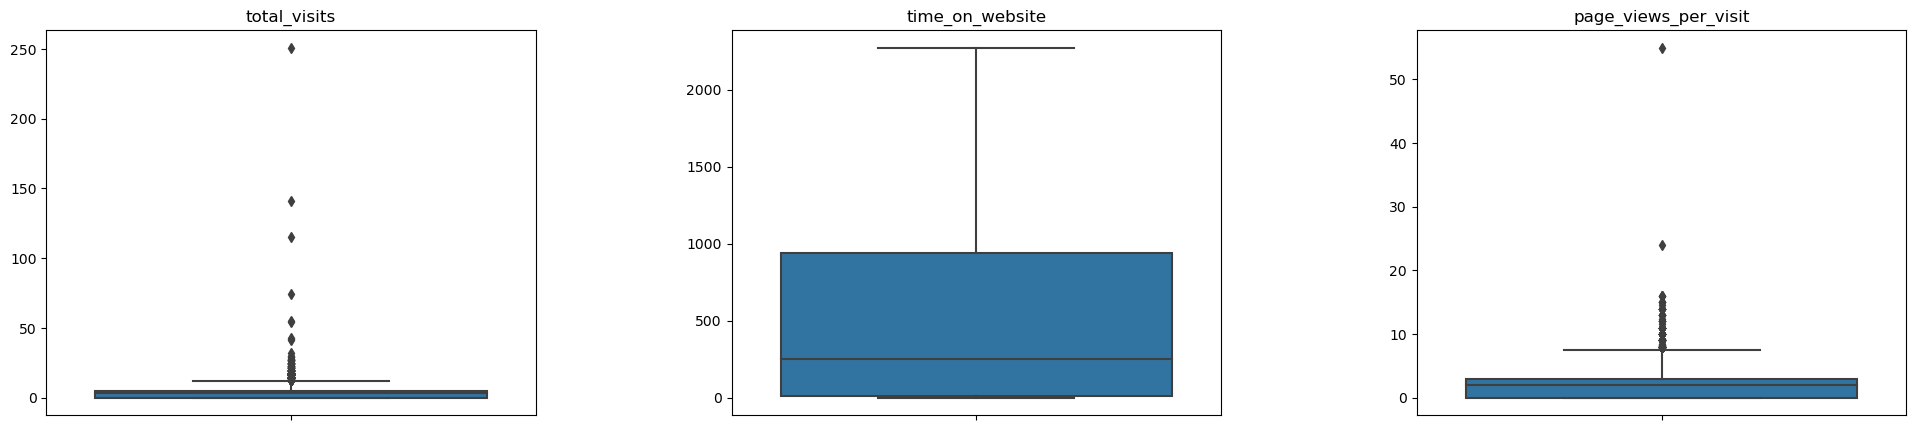

In [84]:
# checking for outliers in numerical columns

numerical_columns = ['total_visits', 'time_on_website', 'page_views_per_visit']

plt.figure(figsize=[24,5])
plt.subplots_adjust(wspace=0.4,hspace=0.5)

for i,j in enumerate(numerical_columns):
    plt.subplot(1,3,i+1)

    sns.boxplot(y=xleads[j])
    plt.ylabel(None)
    plt.title(j)

In [86]:
# columns with outliers

outlier_columns = ['total_visits', 'page_views_per_visit']

In [87]:
xleads.describe(percentiles=[.10,.25,.50,.75,.95])

,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,interview_cheatsheet
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.385390,3.394156,487.698268,2.327787,0.312554
std,0.270435,0.486714,4.836682,548.021466,2.164258,0.463559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000
75%,0.000000,1.000000,5.000000,936.000000,3.000000,1.000000
95%,1.000000,1.000000,10.000000,1562.000000,6.000000,1.000000
max,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000


In [88]:
# capping and flooring upper and lower bounds with inter quartile range

for i in outlier_columns:
  q1 = xleads[i].describe()["25%"]
  q3 = xleads[i].describe()["75%"]
  IQR = q3 - q1

  upperbound = q3 + 1.5*IQR
  lowerbound = q1 - 1.5*IQR

  # capping upperbound
  xleads[i] = np.where(xleads[i] > upperbound, upperbound,xleads[i])

  # flooring lowerbound
  xleads[i] = np.where(xleads[i] < lowerbound, lowerbound,xleads[i])

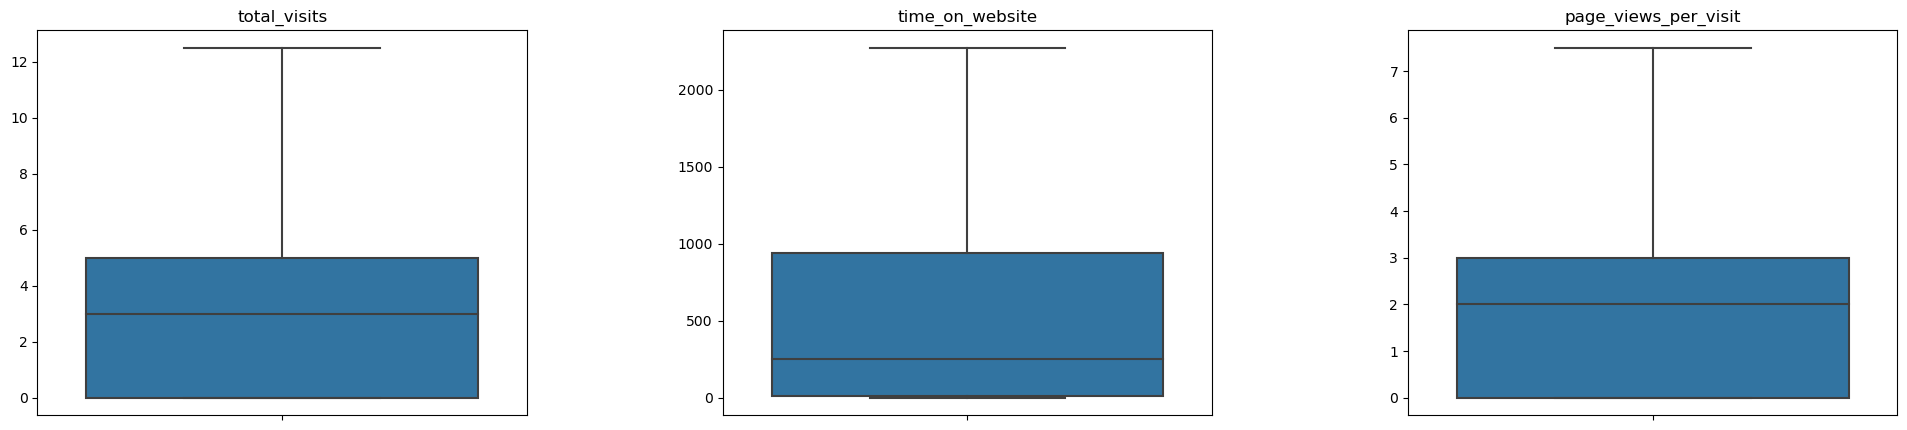

In [89]:
# verifying if outliers are handled properly

numerical_columns = ['total_visits', 'time_on_website', 'page_views_per_visit']

plt.figure(figsize=[24,5])
plt.subplots_adjust(wspace=0.4,hspace=0.5)

for i,j in enumerate(numerical_columns):
    plt.subplot(1,3,i+1)

    sns.boxplot(y=xleads[j])
    plt.ylabel(None)
    plt.title(j)

In [90]:
xleads["lead_source"].value_counts() > 100

google                True
direct traffic        True
olark chat            True
organic search        True
reference             True
welingak website      True
referral sites        True
facebook             False
bing                 False
click2call           False
social media         False
live chat            False
press_release        False
pay per click ads    False
blog                 False
welearn              False
welearnblog_home     False
youtubechannel       False
testone              False
nc_edm               False
Name: lead_source, dtype: bool

The "lead_source" column contains numerous values that occur infrequently compared to others. To enhance dummy variable creation, we can categorize these less common values and replace them with a unified category.

In [91]:
# replacing values with other

xleads['lead_source'] = xleads['lead_source'].replace(["facebook","bing","click2call","press_release",
                                                           "social media","live chat","youtubechannel",
                                                           "testone","pay per click ads","welearnblog_home",
                                                           "welearn","blog","nc_edm"],"others")

In [92]:
xleads["lead_source"].value_counts()

google              2909
direct traffic      2543
olark chat          1755
organic search      1154
reference            534
welingak website     142
referral sites       125
others                78
Name: lead_source, dtype: int64

Similarly, we have the capability to manage lower frequency values in the "last_activity" column.

In [93]:
xleads["last_activity"].value_counts()

email opened                    3540
sms sent                        2745
olark chat conversation          973
page visited on website          640
converted to lead                428
email bounced                    326
email link clicked               267
form submitted on website        116
unreachable                       93
unsubscribed                      61
had a phone conversation          30
approached upfront                 9
view in browser link clicked       6
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: last_activity, dtype: int64

In [94]:
xleads["last_activity"].value_counts() > 100

email opened                     True
sms sent                         True
olark chat conversation          True
page visited on website          True
converted to lead                True
email bounced                    True
email link clicked               True
form submitted on website        True
unreachable                     False
unsubscribed                    False
had a phone conversation        False
approached upfront              False
view in browser link clicked    False
email received                  False
email marked spam               False
visited booth in tradeshow      False
resubscribed to emails          False
Name: last_activity, dtype: bool

In [95]:
xleads['last_activity'] = xleads['last_activity'].replace(['unreachable','unsubscribed',
                                                               'had a phone conversation',
                                                               'approached upfront',
                                                               'view in browser link clicked',
                                                               'email marked spam',
                                                               'email received','visited booth in tradeshow',
                                                               'resubscribed to emails'],'others')

In [96]:
xleads["last_activity"].value_counts()

email opened                 3540
sms sent                     2745
olark chat conversation       973
page visited on website       640
converted to lead             428
email bounced                 326
email link clicked            267
others                        205
form submitted on website     116
Name: last_activity, dtype: int64

In [97]:
xleads.head()

,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,last_activity,specialization,occupation,interview_cheatsheet
0,api,olark chat,0,0,0.0,0,0.0,page visited on website,others,unemployed,0
1,api,organic search,0,0,5.0,674,2.5,email opened,others,unemployed,0
2,landing page submission,direct traffic,0,1,2.0,1532,2.0,email opened,business administration,student,1
3,landing page submission,direct traffic,0,0,1.0,305,1.0,others,media and advertising,unemployed,0
4,landing page submission,google,0,1,2.0,1428,1.0,converted to lead,others,unemployed,0


In [98]:
xleads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lead_origin           9240 non-null   object 
 1   lead_source           9240 non-null   object 
 2   do_not_email          9240 non-null   int64  
 3   converted             9240 non-null   int64  
 4   total_visits          9240 non-null   float64
 5   time_on_website       9240 non-null   int64  
 6   page_views_per_visit  9240 non-null   float64
 7   last_activity         9240 non-null   object 
 8   specialization        9240 non-null   object 
 9   occupation            9240 non-null   object 
 10  interview_cheatsheet  9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


In [99]:
xleads.shape

(9240, 11)

In [100]:
# checking imbalance in dataset

xleads['converted'].value_counts(normalize=True) * 100

0    61.461039
1    38.538961
Name: converted, dtype: float64

38% of the leads undergo conversion. Despite the dataset's imbalance, given its substantial size, using it for model training should be acceptable.

In [101]:
# cleaned dataset

xleads.head()

,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,last_activity,specialization,occupation,interview_cheatsheet
0,api,olark chat,0,0,0.0,0,0.0,page visited on website,others,unemployed,0
1,api,organic search,0,0,5.0,674,2.5,email opened,others,unemployed,0
2,landing page submission,direct traffic,0,1,2.0,1532,2.0,email opened,business administration,student,1
3,landing page submission,direct traffic,0,0,1.0,305,1.0,others,media and advertising,unemployed,0
4,landing page submission,google,0,1,2.0,1428,1.0,converted to lead,others,unemployed,0


## Step 3 - EDA

### Univariate analysis

In [102]:
# getting cat cols

categorical_columns = xleads.select_dtypes(include=['category', 'object']).columns.tolist()
categorical_columns

['lead_origin', 'lead_source', 'last_activity', 'specialization', 'occupation']

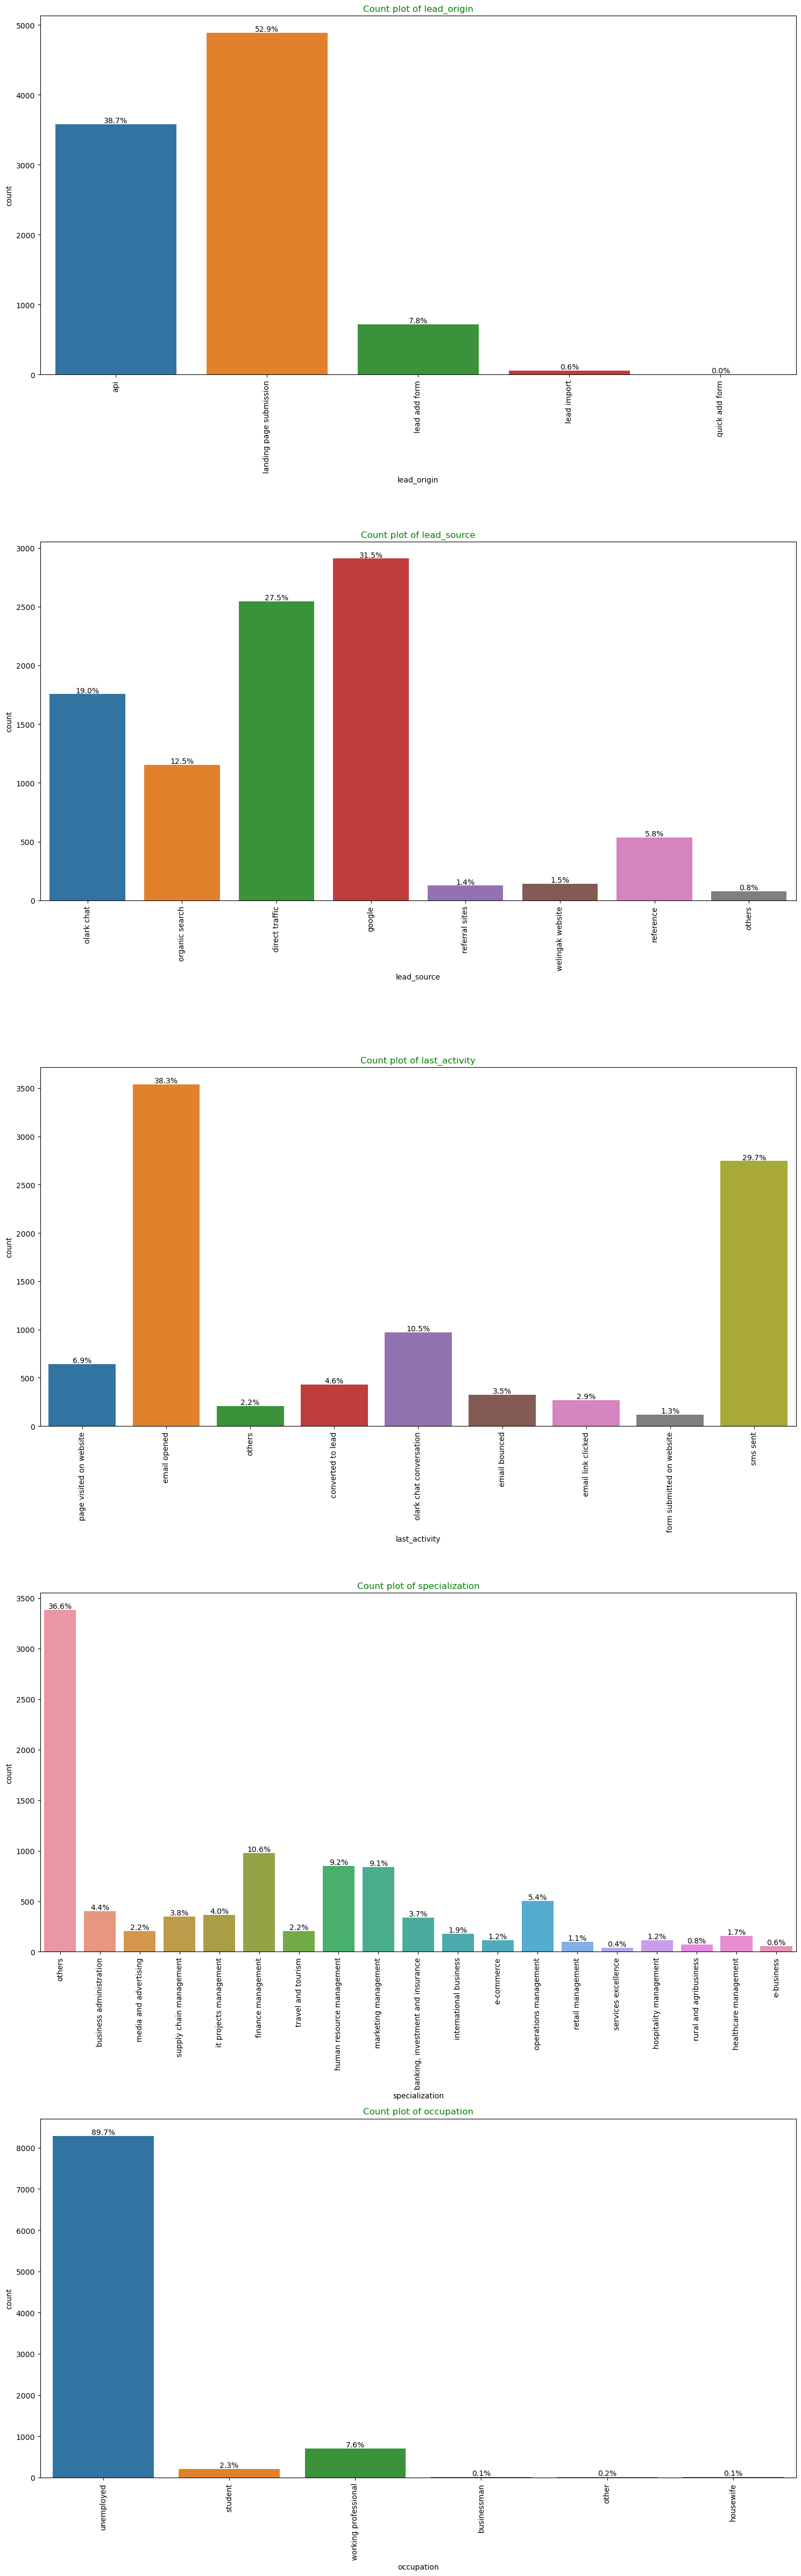

In [103]:
# Setting the number of rows and columns for subplots
rows = 5
cols = 1

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 48))

# Flatten the axes
axes = axes.flatten()

# Loop through cat cols and create count plots
for i, col in enumerate(categorical_columns):
    ax = axes[i]

    sns.countplot(x=col, data=xleads, ax=ax)

    total = len(xleads[col])

    for p in ax.patches:
        text = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    ax.set_title("Count plot of {}".format(col), color="green")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels

# Adjust layout
plt.tight_layout()
plt.show()

**Major findings from the analysis of individual variables:**

1. For lead_origin, "landing_page_submission" emerges as the predominant choice, constituting 53% of the customer base. Following closely is "api," making up 39% of customers.

2. Regarding do_not_email, a significant 92% of individuals have chosen not to receive emails related to the course.

3. In the lead_source category, the majority of leads (58%) originate from a combination of "google" and "direct_traffic."

4. In the last_activity dimension, approximately 68% of customer engagements involve activities like sma_sent and email_opened.

5. Current Occupation analysis reveals that around 90% of customers fall under the "unemployed" classification in the occupation category.


### BiVariate Analysis

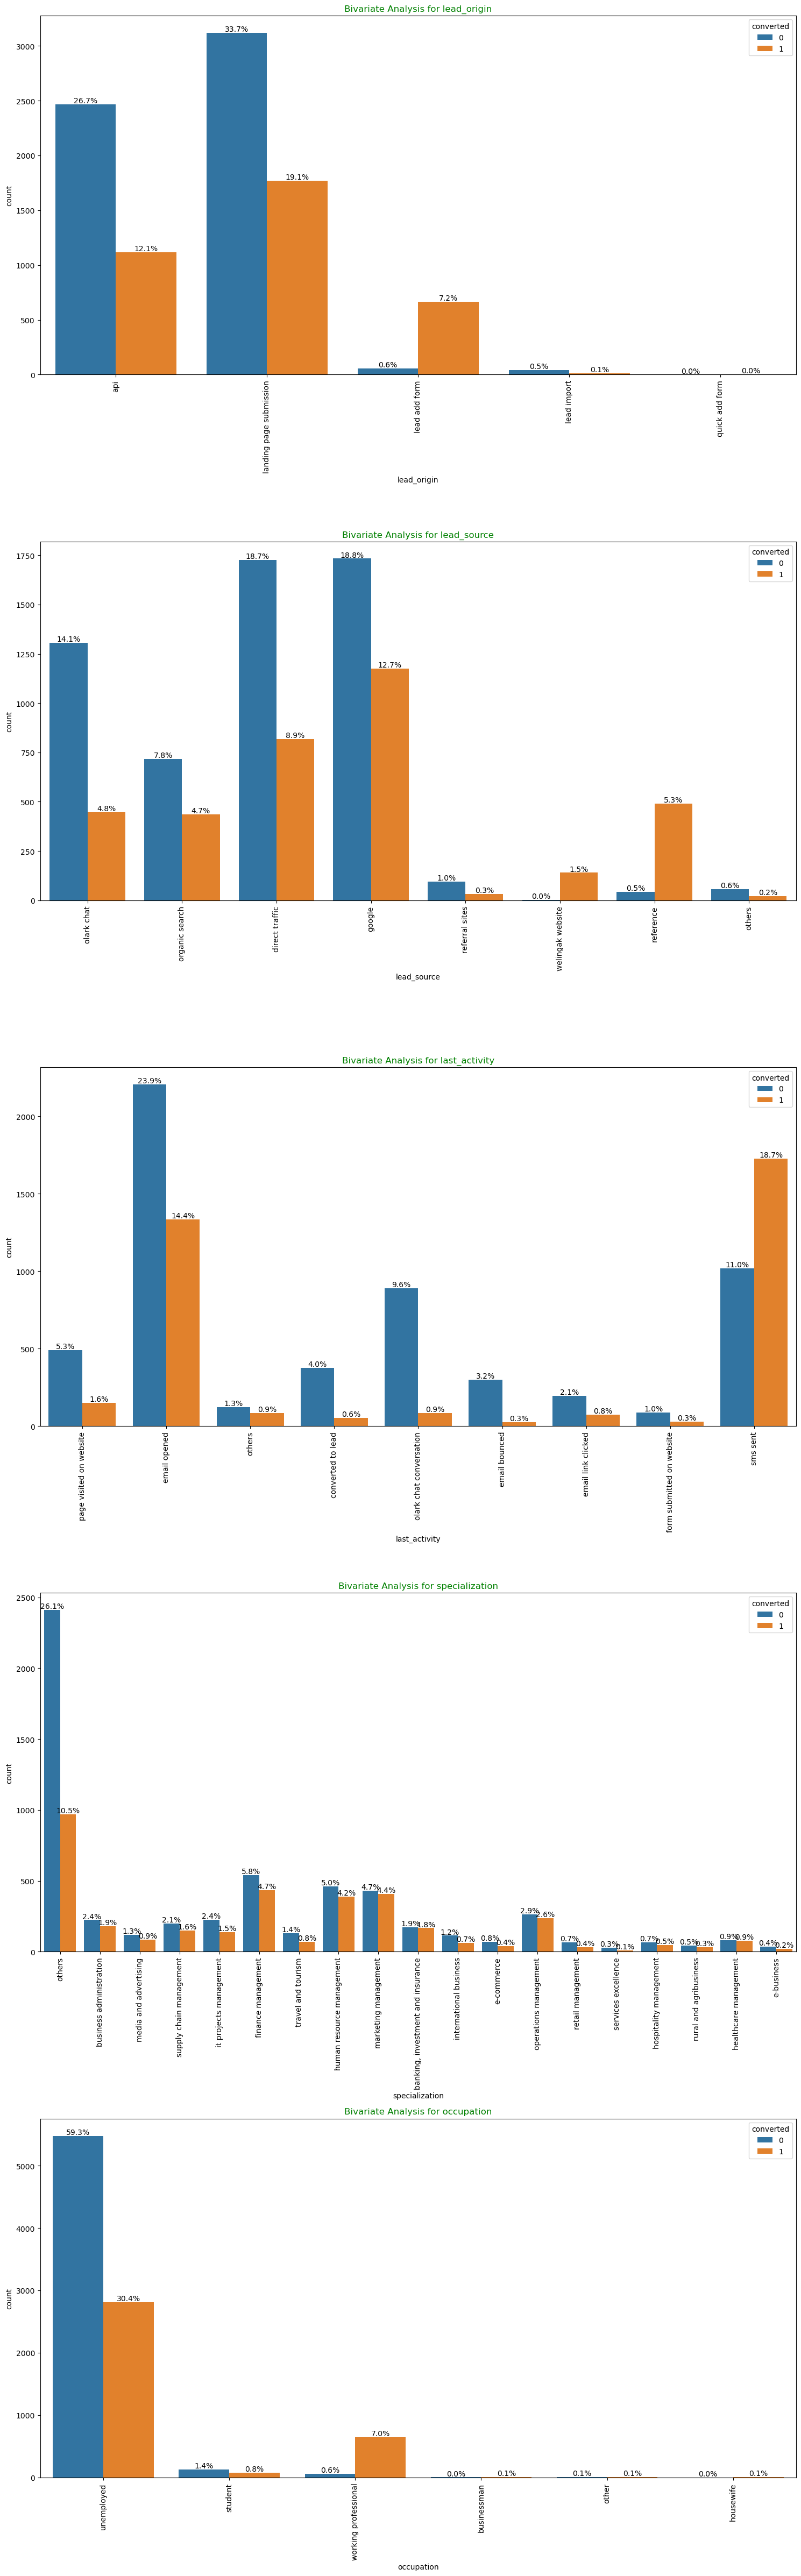

In [104]:
# Setting the number of rows and columns for subplots
rows = 5
cols = 1

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 48))

# Flatten the axes
axes = axes.flatten()

# Loop through categorical columns and create bivariate count plots with percentages
for i, col in enumerate(categorical_columns):
    ax = axes[i]

    sns.countplot(x=col, hue='converted', data=xleads, ax=ax)

    total = len(xleads[col])

    for p in ax.patches:
        text = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    ax.set_title("Bivariate Analysis for {}".format(col), color="green")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels

# Adjust layout
plt.tight_layout()
plt.show()

**Main Findings:**

1. Lead Origin: Approximately 52% of all leads originated from "Landing Page Submission," boasting a lead conversion rate (LCR) of 36%. The "API" identified around 39% of customers with a corresponding LCR of 31%.


2. Current Occupation: A significant 90% of customers are unemployed, yet they exhibit a commendable lead conversion rate (LCR) of 34%. On the contrary, Working Professionals constitute only 7.6% of total customers but display a remarkably high LCR of almost 92%.


3. Do Not Email:A notable 92% of individuals have chosen not to receive emails regarding the course.


4. Lead Source: Google stands out with a high LCR of 40% among its 31% customer base. Direct Traffic follows with a 32% LCR and 27% of customers, while Organic Search contributes a 37.8% LCR with a smaller 12.5% of customers. Despite Reference having an LCR of 91%, it comprises only approximately 6% of customers through this Lead Source.


5. Last Activity:'SMS Sent' holds a notable lead conversion rate of 63%, contributing to 30% of the last activities. 'Email Opened' represents 38% of the last activities performed by customers, accompanied by a 37% lead conversion rate.


6. Specialization: Marketing Management, HR Management, and Finance Management demonstrate substantial contributions to lead conversion rates. 



Lead conversion rate = %converted / total_leads - in the variable eg., for api it is 12.1% / 38.8% = ~31%

In [105]:
numerical_columns = ['total_visits', 'time_on_website', 'page_views_per_visit']

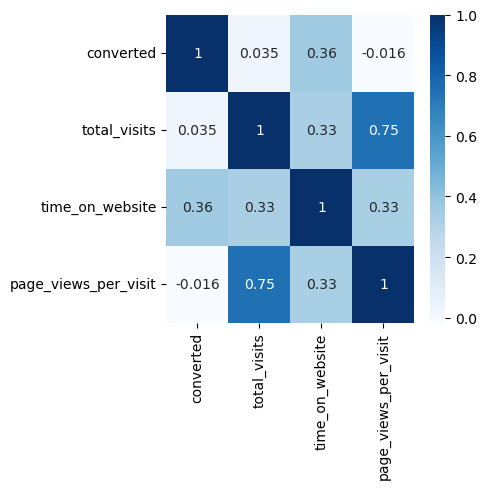

In [107]:
# checking correlation on num cols

num_columns =["converted", 'total_visits', 'time_on_website', 'page_views_per_visit']

plt.figure(figsize=(4, 4))
sns.heatmap(data=xleads[num_columns].corr(),cmap="Blues",annot=True)
plt.show()

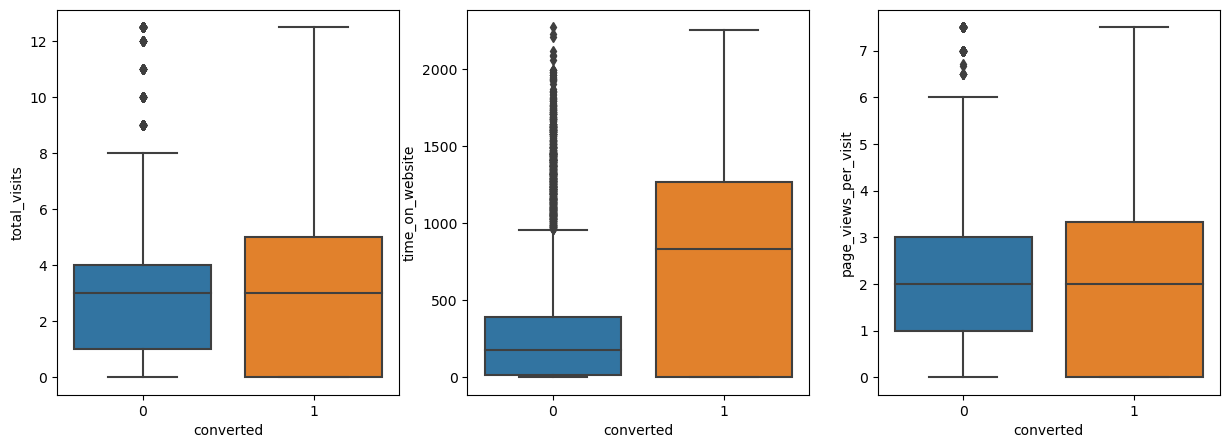

In [108]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'total_visits', x = 'converted', data = xleads)
plt.subplot(1,3,2)
sns.boxplot(y = 'time_on_website', x = 'converted', data = xleads)
plt.subplot(1,3,3)
sns.boxplot(y = 'page_views_per_visit', x = 'converted', data = xleads)
plt.show()

leads who spend most time_on_website has more conversion rate

## Step 4 - Data Preparation

In [109]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy_variable = pd.get_dummies(xleads[["lead_origin","lead_source","last_activity","specialization","occupation"]], drop_first=True)

# Adding the results to the original dataframe
xleads = pd.concat([xleads, dummy_variable], axis=1)
xleads.head()

,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,last_activity,specialization,occupation,...,specialization_retail management,specialization_rural and agribusiness,specialization_services excellence,specialization_supply chain management,specialization_travel and tourism,occupation_housewife,occupation_other,occupation_student,occupation_unemployed,occupation_working professional
0,api,olark chat,0,0,0.0,0,0.0,page visited on website,others,unemployed,...,0,0,0,0,0,0,0,0,1,0
1,api,organic search,0,0,5.0,674,2.5,email opened,others,unemployed,...,0,0,0,0,0,0,0,0,1,0
2,landing page submission,direct traffic,0,1,2.0,1532,2.0,email opened,business administration,student,...,0,0,0,0,0,0,0,1,0,0
3,landing page submission,direct traffic,0,0,1.0,305,1.0,others,media and advertising,unemployed,...,0,0,0,0,0,0,0,0,1,0
4,landing page submission,google,0,1,2.0,1428,1.0,converted to lead,others,unemployed,...,0,0,0,0,0,0,0,0,1,0


In [110]:
xleads = xleads.drop(["lead_origin","lead_source","last_activity","specialization","occupation"],axis = 1)

In [111]:
xleads.shape

(9240, 48)

In [112]:
from sklearn.model_selection import train_test_split

# assigning predictor variables to X
X = xleads.drop('converted', axis=1)

# assigning Target variables to y
y = xleads["converted"]

# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=3)

In [113]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape, "\n")
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_train: (6468, 47) 
y_train: (6468,) 

X_test: (2772, 47) 
y_test: (2772,)


In [114]:
from sklearn.preprocessing import StandardScaler

# using standard scaler for scaling the features
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_columns = X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_columns] = scaler.fit_transform(X_train[num_columns])

# X-train dataframe after standard scaling
X_train.head()

,do_not_email,total_visits,time_on_website,page_views_per_visit,interview_cheatsheet,lead_origin_landing page submission,lead_origin_lead add form,lead_origin_lead import,lead_origin_quick add form,lead_source_google,...,specialization_retail management,specialization_rural and agribusiness,specialization_services excellence,specialization_supply chain management,specialization_travel and tourism,occupation_housewife,occupation_other,occupation_student,occupation_unemployed,occupation_working professional
2010,-0.297835,1.243167,0.694698,2.477842,-0.674867,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3064,-0.297835,-1.075118,-0.381674,-1.198320,-0.674867,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3989,-0.297835,-1.075118,-0.890572,-1.198320,-0.674867,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4312,-0.297835,-0.081567,-0.583037,-0.410571,-0.674867,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5600,-0.297835,-0.743934,-0.581206,-0.673154,1.481773,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


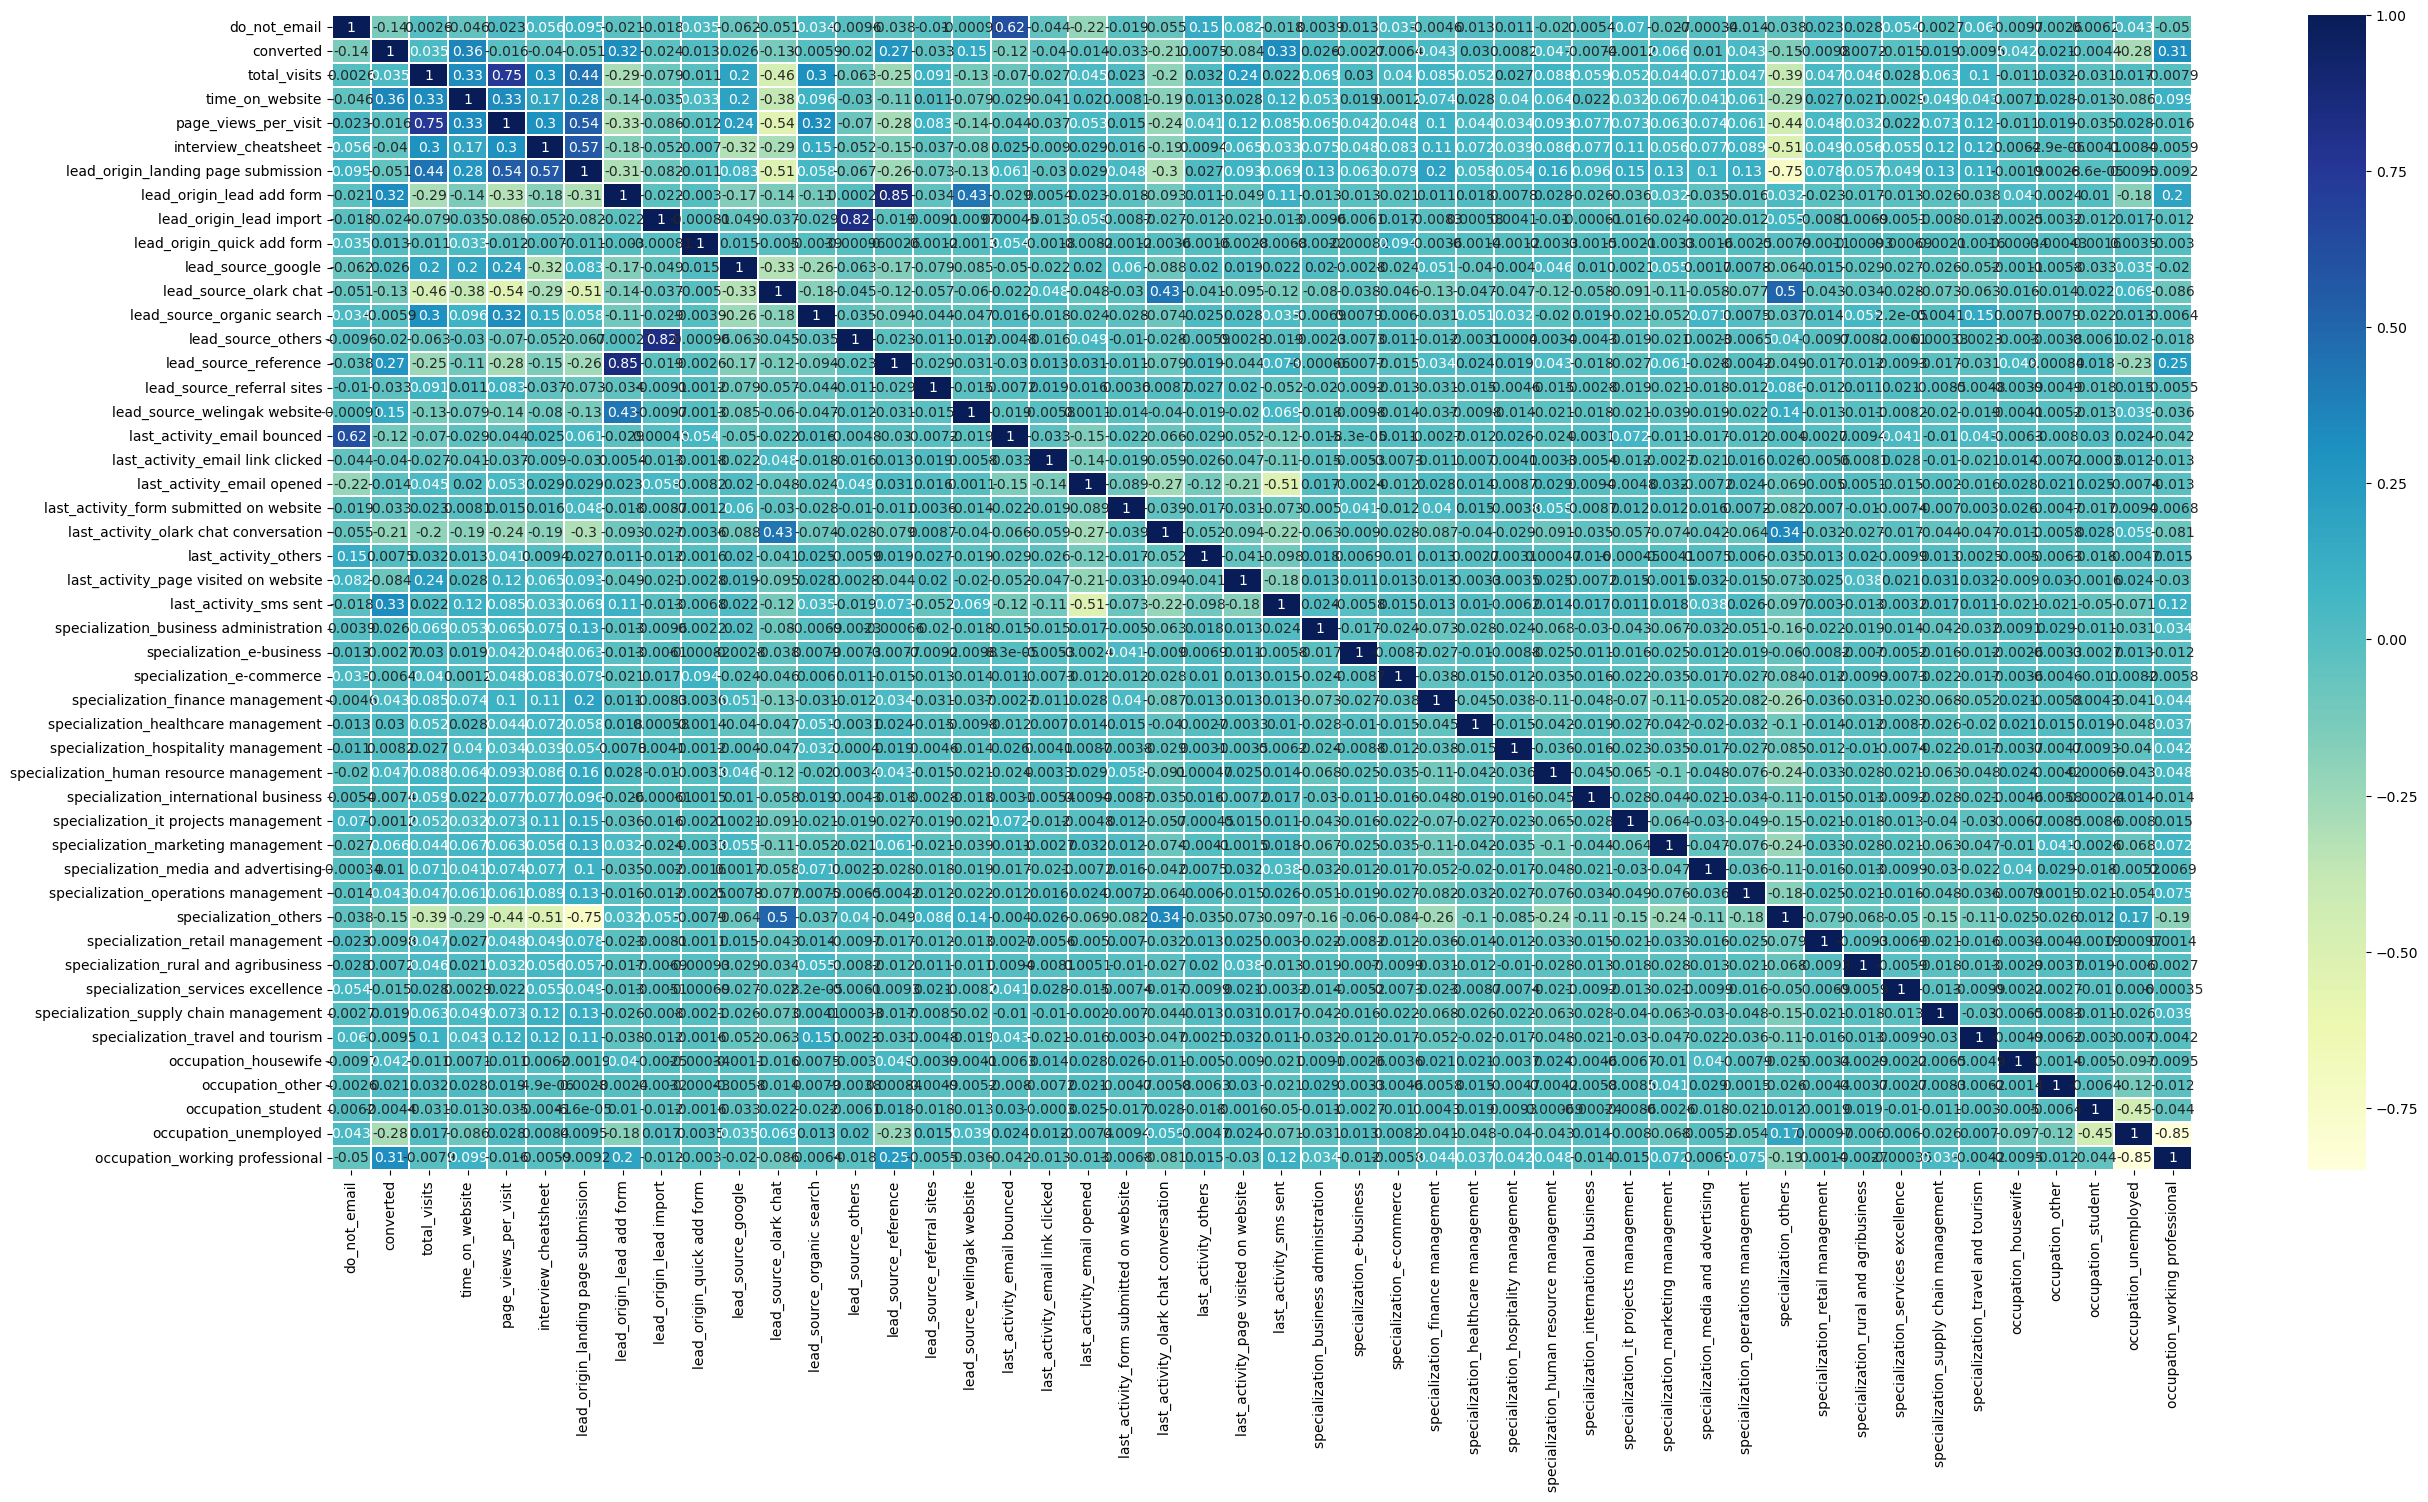

In [115]:
# analyse correlation matrix
plt.figure(figsize = (30,15))
sns.heatmap(xleads.corr(),linewidths=0.01,cmap="YlGnBu",annot=True)
plt.show()

Since above image has a lot of variable. to simplify, taking highly correlated values(> 0.85)

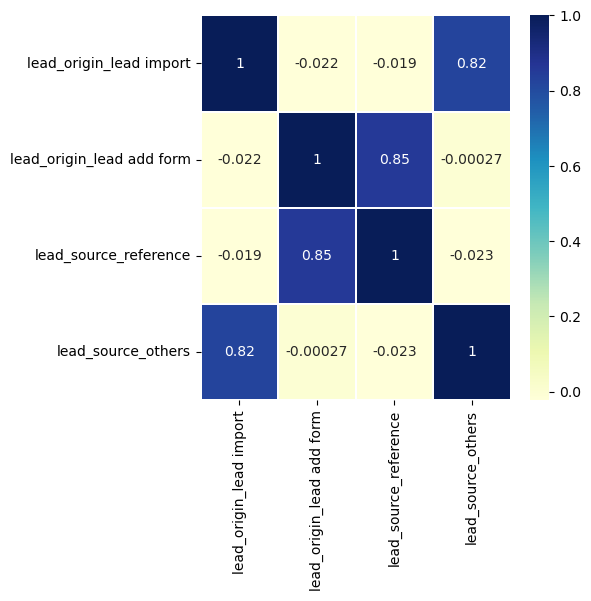

In [116]:
plt.figure(figsize = (5,5))
sns.heatmap(xleads[["lead_origin_lead import", "lead_origin_lead add form", "lead_source_reference", "lead_source_others"]].corr(),linewidths=0.01,cmap="YlGnBu",annot=True)
plt.show()

Due to a strong correlation between lead_source_others and lead_origin_lead_import, as well as lead_source_reference and lead_orign_lead_add_form, it is advisable to retain one from each pair and discard the others.

In [117]:
X_test = X_test.drop(['lead_source_others','lead_origin_lead add form'],axis = 1)

X_train = X_train.drop(['lead_source_others','lead_origin_lead add form'],axis = 1)

In [118]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape, "\n")
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_train: (6468, 45) 
y_train: (6468,) 

X_test: (2772, 45) 
y_test: (2772,)


## Step 5 - Model Building

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# using RFE to reduce variables

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=18)
rfe = rfe.fit(X_train, y_train)

In [120]:
# checking the output of RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('do_not_email', False, 9),
 ('total_visits', False, 5),
 ('time_on_website', True, 1),
 ('page_views_per_visit', False, 6),
 ('interview_cheatsheet', False, 13),
 ('lead_origin_landing page submission', True, 1),
 ('lead_origin_lead import', False, 10),
 ('lead_origin_quick add form', False, 28),
 ('lead_source_google', False, 23),
 ('lead_source_olark chat', True, 1),
 ('lead_source_organic search', False, 17),
 ('lead_source_reference', True, 1),
 ('lead_source_referral sites', False, 7),
 ('lead_source_welingak website', True, 1),
 ('last_activity_email bounced', True, 1),
 ('last_activity_email link clicked', False, 3),
 ('last_activity_email opened', True, 1),
 ('last_activity_form submitted on website', False, 16),
 ('last_activity_olark chat conversation', True, 1),
 ('last_activity_others', True, 1),
 ('last_activity_page visited on website', False, 11),
 ('last_activity_sms sent', True, 1),
 ('specialization_business administration', False, 22),
 ('specialization_e-business'

In [121]:
# Checking the top 15 features chosen by RFE

top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

,features,Feature Chosen,Ranking
44,occupation_working professional,True,1
43,occupation_unemployed,True,1
21,last_activity_sms sent,True,1
19,last_activity_others,True,1
18,last_activity_olark chat conversation,True,1
16,last_activity_email opened,True,1
14,last_activity_email bounced,True,1
13,lead_source_welingak website,True,1
11,lead_source_reference,True,1
34,specialization_others,True,1


In [122]:
# extracting columns which are selected by RFE

rfe_columns = X_train.columns[rfe.support_]
rfe_columns

Index(['time_on_website', 'lead_origin_landing page submission',
       'lead_source_olark chat', 'lead_source_reference',
       'lead_source_welingak website', 'last_activity_email bounced',
       'last_activity_email opened', 'last_activity_olark chat conversation',
       'last_activity_others', 'last_activity_sms sent',
       'specialization_hospitality management', 'specialization_others',
       'specialization_retail management', 'occupation_housewife',
       'occupation_other', 'occupation_student', 'occupation_unemployed',
       'occupation_working professional'],
      dtype='object')

In [123]:
# creating function for calculating VIFs for variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

### Model 1

In [124]:
bool_col = X_train.select_dtypes(include='bool').columns.tolist()
 

# Defining the map function
def binary_map(x):
    return x.map({True: 1, False: 0})

# Applying the function to the housing list
X_train[bool_col] = X_train[bool_col].apply(binary_map)

In [127]:
import statsmodels.api as sm

# Building model using statsmodels, for the detailed statistics

# columns selected by RFE to be used for this model
rfe_columns=X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_RFE = X_train[rfe_columns]

# Adding a constant variable
X_train_SM1 = sm.add_constant(X_train_RFE)

# Create a fitted model
log_FM1 = sm.GLM(y_train,X_train_SM1,family = sm.families.Binomial()).fit()

log_FM1.params


const                                    -0.660094
time_on_website                           1.077089
lead_origin_landing page submission      -1.159719
lead_source_olark chat                    1.071809
lead_source_reference                     2.937725
lead_source_welingak website              6.434427
last_activity_email bounced              -1.252025
last_activity_email opened                0.717528
last_activity_olark chat conversation    -0.998273
last_activity_others                      1.107610
last_activity_sms sent                    1.848840
specialization_hospitality management    -0.720078
specialization_others                    -1.190884
specialization_retail management         -0.480784
occupation_housewife                     22.729744
occupation_other                         -0.182381
occupation_student                        0.192604
occupation_unemployed                    -0.223125
occupation_working professional           2.322841
dtype: float64


>  occupation_housewife has highest p-value >0.05 hence dropping.



In [129]:
rfe_columns=rfe_columns.drop("occupation_housewife")

### Model 2

In [130]:
# Creating X_train dataframe with variables selected by RFE
X_train_RFE = X_train[rfe_columns]

# Adding a constant variable
X_train_SM2 = sm.add_constant(X_train_RFE)

# Create a fitted model
log_FM2 = sm.GLM(y_train,X_train_SM2,family = sm.families.Binomial()).fit()

log_FM2.params

const                                    1.212669
time_on_website                          1.076350
lead_origin_landing page submission     -1.152295
lead_source_olark chat                   1.071456
lead_source_reference                    2.943019
lead_source_welingak website             6.435456
last_activity_email bounced             -1.250000
last_activity_email opened               0.722152
last_activity_olark chat conversation   -1.004190
last_activity_others                     1.102032
last_activity_sms sent                   1.850678
specialization_hospitality management   -0.720476
specialization_others                   -1.186760
specialization_retail management        -0.481821
occupation_other                        -2.061121
occupation_student                      -1.688282
occupation_unemployed                   -2.103769
occupation_working professional          0.442223
dtype: float64

In [131]:
log_FM2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2730.6
Date:                Sun, 14 Jan 2024   Deviance:                       5461.1
Time:                        13:19:27   Pearson chi2:                 7.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3842
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.2127      0.773      1.569      0.117      -0.302       2.727
time_on_website                           1.0763      0.039     27.676      0.000       1.000       1.153
lead_origin_landing page submission      -1.1523      0.123     -9.342      0.000      -1.394      -0.911
lead_source_olark chat                    1.0715      0.119      9.007      0.000       0.838       1.305
lead_source_reference                     2.9430      0.225     13.103      0.000       2.503       3.383
lead_source_welingak website              6.4355      1.020      6.311      0.000       4.437       8.434
last_activity_email bounced              -1.2500      0.308     -4.059      0.000      -1.854      -0.646
last_activity_email opened                0.7222      0.107      6.756      0.000       0.513       0.932
last_activity_olark chat conversation    -1.0042      0.190     -5.290      0.000      -1.376      -0.632
last_activity_others                      1.1020      0.236      4.670      0.000       0.640       1.565
last_activity_sms sent                    1.8507      0.110     16.761      0.000       1.634       2.067
specialization_hospitality management    -0.7205      0.315     -2.284      0.022      -1.339      -0.102
specialization_others                    -1.1868      0.121     -9.846      0.000      -1.423      -0.951
specialization_retail management         -0.4818      0.362     -1.330      0.183      -1.192       0.228
occupation_other                         -2.0611      1.037     -1.987      0.047      -4.094      -0.028
occupation_student                       -1.6883      0.796     -2.121      0.034      -3.248      -0.128
occupation_unemployed                    -2.1038      0.766     -2.747      0.006      -3.605      -0.603
occupation_working professional           0.4422      0.784      0.564      0.573      -1.095       1.980
=========================================================================================================
"""


>  occupation_working professional has highest p-value >0.05 hence dropping.


In [132]:
# Dropping 'occupation_working professional' column
rfe_columns=rfe_columns.drop("occupation_working professional")

### Model 3

In [133]:
# Creating X_train dataframe with variables selected by RFE
X_train_RFE = X_train[rfe_columns]

# Adding a constant variable
X_train_SM3 = sm.add_constant(X_train_RFE)

# Create a fitted model
log_FM3 = sm.GLM(y_train,X_train_SM3,family = sm.families.Binomial()).fit()

log_FM3.params

const                                    1.633068
time_on_website                          1.076386
lead_origin_landing page submission     -1.152640
lead_source_olark chat                   1.071326
lead_source_reference                    2.942580
lead_source_welingak website             6.435469
last_activity_email bounced             -1.247007
last_activity_email opened               0.723561
last_activity_olark chat conversation   -1.004457
last_activity_others                     1.103651
last_activity_sms sent                   1.852520
specialization_hospitality management   -0.717602
specialization_others                   -1.187062
specialization_retail management        -0.480549
occupation_other                        -2.482168
occupation_student                      -2.109520
occupation_unemployed                   -2.525215
dtype: float64

In [134]:
log_FM3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2730.7
Date:                Sun, 14 Jan 2024   Deviance:                       5461.4
Time:                        13:21:06   Pearson chi2:                 7.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3842
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.6331      0.212      7.697      0.000       1.217       2.049
time_on_website                           1.0764      0.039     27.676      0.000       1.000       1.153
lead_origin_landing page submission      -1.1526      0.123     -9.346      0.000      -1.394      -0.911
lead_source_olark chat                    1.0713      0.119      9.006      0.000       0.838       1.304
lead_source_reference                     2.9426      0.225     13.101      0.000       2.502       3.383
lead_source_welingak website              6.4355      1.020      6.311      0.000       4.437       8.434
last_activity_email bounced              -1.2470      0.308     -4.053      0.000      -1.850      -0.644
last_activity_email opened                0.7236      0.107      6.770      0.000       0.514       0.933
last_activity_olark chat conversation    -1.0045      0.190     -5.288      0.000      -1.377      -0.632
last_activity_others                      1.1037      0.236      4.677      0.000       0.641       1.566
last_activity_sms sent                    1.8525      0.110     16.783      0.000       1.636       2.069
specialization_hospitality management    -0.7176      0.315     -2.277      0.023      -1.335      -0.100
specialization_others                    -1.1871      0.121     -9.850      0.000      -1.423      -0.951
specialization_retail management         -0.4805      0.362     -1.328      0.184      -1.190       0.229
occupation_other                         -2.4822      0.722     -3.436      0.001      -3.898      -1.066
occupation_student                       -2.1095      0.281     -7.511      0.000      -2.660      -1.559
occupation_unemployed                    -2.5252      0.177    -14.302      0.000      -2.871      -2.179
=========================================================================================================
"""


>  specialization_retail management has highest p-value >0.05 hence dropping.



In [135]:
# Dropping 'specialization_retail management' column
rfe_columns=rfe_columns.drop("specialization_retail management")

### Model 4

In [136]:
# Creating X_train dataframe with variables selected by RFE
X_train_RFE = X_train[rfe_columns]

# Adding a constant variable
X_train_SM4 = sm.add_constant(X_train_RFE)

# Create a fitted model
log_FM4 = sm.GLM(y_train,X_train_SM4,family = sm.families.Binomial()).fit()

log_FM4.params

const                                    1.628741
time_on_website                          1.076222
lead_origin_landing page submission     -1.156233
lead_source_olark chat                   1.071257
lead_source_reference                    2.942089
lead_source_welingak website             6.436091
last_activity_email bounced             -1.252873
last_activity_email opened               0.724204
last_activity_olark chat conversation   -1.003862
last_activity_others                     1.104635
last_activity_sms sent                   1.853723
specialization_hospitality management   -0.710860
specialization_others                   -1.183235
occupation_other                        -2.476132
occupation_student                      -2.104963
occupation_unemployed                   -2.525421
dtype: float64

In [137]:
log_FM4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2731.6
Date:                Sun, 14 Jan 2024   Deviance:                       5463.3
Time:                        13:22:44   Pearson chi2:                 7.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3840
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.6287      0.212      7.675      0.000       1.213       2.045
time_on_website                           1.0762      0.039     27.682      0.000       1.000       1.152
lead_origin_landing page submission      -1.1562      0.123     -9.373      0.000      -1.398      -0.914
lead_source_olark chat                    1.0713      0.119      9.004      0.000       0.838       1.304
lead_source_reference                     2.9421      0.225     13.098      0.000       2.502       3.382
lead_source_welingak website              6.4361      1.020      6.312      0.000       4.437       8.435
last_activity_email bounced              -1.2529      0.308     -4.069      0.000      -1.856      -0.649
last_activity_email opened                0.7242      0.107      6.778      0.000       0.515       0.934
last_activity_olark chat conversation    -1.0039      0.190     -5.287      0.000      -1.376      -0.632
last_activity_others                      1.1046      0.236      4.679      0.000       0.642       1.567
last_activity_sms sent                    1.8537      0.110     16.800      0.000       1.637       2.070
specialization_hospitality management    -0.7109      0.315     -2.256      0.024      -1.329      -0.093
specialization_others                    -1.1832      0.121     -9.816      0.000      -1.419      -0.947
occupation_other                         -2.4761      0.722     -3.427      0.001      -3.892      -1.060
occupation_student                       -2.1050      0.281     -7.495      0.000      -2.655      -1.555
occupation_unemployed                    -2.5254      0.177    -14.295      0.000      -2.872      -2.179
=========================================================================================================
"""

Since all variables has p-vale < 0.05. we'll check the VIFs

In [138]:
get_vif(X_train_RFE)

,Features,VIF
0,occupation_unemployed,8.84
1,lead_origin_landing page submission,5.25
2,specialization_others,3.98
3,last_activity_email opened,2.90
4,last_activity_sms sent,2.45
5,lead_source_olark chat,2.21
6,last_activity_olark chat conversation,1.88
7,lead_source_reference,1.27
8,time_on_website,1.25
9,occupation_student,1.23


VIF is high for few variables dropping one-by-one and re-checking p-values and VIFs

In [139]:
# Dropping 'occupation_unemployed' column
rfe_columns=rfe_columns.drop("occupation_unemployed")

### Model 5

In [140]:
# Creating X_train dataframe with variables selected by RFE
X_train_RFE = X_train[rfe_columns]

# Adding a constant variable
X_train_SM5 = sm.add_constant(X_train_RFE)

# Create a fitted model
log_FM5 = sm.GLM(y_train,X_train_SM5,family = sm.families.Binomial()).fit()

log_FM5.params

const                                   -0.464704
time_on_website                          1.082665
lead_origin_landing page submission     -1.379266
lead_source_olark chat                   1.060654
lead_source_reference                    3.036189
lead_source_welingak website             6.391224
last_activity_email bounced             -1.263662
last_activity_email opened               0.687419
last_activity_olark chat conversation   -1.006143
last_activity_others                     1.069361
last_activity_sms sent                   1.814245
specialization_hospitality management   -0.452754
specialization_others                   -1.547420
occupation_other                        -0.218626
occupation_student                       0.263342
dtype: float64

In [141]:
log_FM5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2873.5
Date:                Sun, 14 Jan 2024   Deviance:                       5747.1
Time:                        13:24:07   Pearson chi2:                 6.73e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3564
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.4647      0.136     -3.426      0.001      -0.731      -0.199
time_on_website                           1.0827      0.038     28.492      0.000       1.008       1.157
lead_origin_landing page submission      -1.3793      0.119    -11.585      0.000      -1.613      -1.146
lead_source_olark chat                    1.0607      0.117      9.077      0.000       0.832       1.290
lead_source_reference                     3.0362      0.219     13.858      0.000       2.607       3.466
lead_source_welingak website              6.3912      1.019      6.269      0.000       4.393       8.389
last_activity_email bounced              -1.2637      0.298     -4.234      0.000      -1.849      -0.679
last_activity_email opened                0.6874      0.103      6.694      0.000       0.486       0.889
last_activity_olark chat conversation    -1.0061      0.183     -5.485      0.000      -1.366      -0.647
last_activity_others                      1.0694      0.228      4.681      0.000       0.622       1.517
last_activity_sms sent                    1.8142      0.106     17.099      0.000       1.606       2.022
specialization_hospitality management    -0.4528      0.295     -1.535      0.125      -1.031       0.125
specialization_others                    -1.5474      0.117    -13.173      0.000      -1.778      -1.317
occupation_other                         -0.2186      0.708     -0.309      0.758      -1.607       1.170
occupation_student                        0.2633      0.228      1.154      0.249      -0.184       0.711
=========================================================================================================
"""


>  specialization_hospitality management has highest p-value >0.05 hence dropping.



In [142]:
# Dropping 'specialization_hospitality management' column
rfe_columns=rfe_columns.drop("specialization_hospitality management")

### Model 6

In [143]:
# Creating X_train dataframe with variables selected by RFE
X_train_RFE = X_train[rfe_columns]

# Adding a constant variable
X_train_SM6 = sm.add_constant(X_train_RFE)

# Create a fitted model
log_FM6 = sm.GLM(y_train,X_train_SM6,family = sm.families.Binomial()).fit()

log_FM6.params

const                                   -0.473660
time_on_website                          1.079997
lead_origin_landing page submission     -1.375603
lead_source_olark chat                   1.060119
lead_source_reference                    3.032416
lead_source_welingak website             6.390290
last_activity_email bounced             -1.274996
last_activity_email opened               0.685957
last_activity_olark chat conversation   -1.009521
last_activity_others                     1.073848
last_activity_sms sent                   1.811645
specialization_others                   -1.536881
occupation_other                        -0.208080
occupation_student                       0.263112
dtype: float64

In [144]:
log_FM6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2874.7
Date:                Sun, 14 Jan 2024   Deviance:                       5749.4
Time:                        13:25:08   Pearson chi2:                 6.73e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3562
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.4737      0.135     -3.498      0.000      -0.739      -0.208
time_on_website                           1.0800      0.038     28.479      0.000       1.006       1.154
lead_origin_landing page submission      -1.3756      0.119    -11.564      0.000      -1.609      -1.142
lead_source_olark chat                    1.0601      0.117      9.077      0.000       0.831       1.289
lead_source_reference                     3.0324      0.219     13.845      0.000       2.603       3.462
lead_source_welingak website              6.3903      1.020      6.268      0.000       4.392       8.388
last_activity_email bounced              -1.2750      0.299     -4.271      0.000      -1.860      -0.690
last_activity_email opened                0.6860      0.103      6.685      0.000       0.485       0.887
last_activity_olark chat conversation    -1.0095      0.183     -5.505      0.000      -1.369      -0.650
last_activity_others                      1.0738      0.228      4.704      0.000       0.626       1.521
last_activity_sms sent                    1.8116      0.106     17.091      0.000       1.604       2.019
specialization_others                    -1.5369      0.117    -13.116      0.000      -1.767      -1.307
occupation_other                         -0.2081      0.708     -0.294      0.769      -1.596       1.180
occupation_student                        0.2631      0.228      1.154      0.249      -0.184       0.710
=========================================================================================================
"""


>  occupation_other management has highest p-value >0.05 hence dropping.


In [145]:
# Dropping 'occupation_other' column
rfe_columns=rfe_columns.drop("occupation_other")

### Model 7

In [146]:
# Creating X_train dataframe with variables selected by RFE
X_train_RFE = X_train[rfe_columns]

# Adding a constant variable
X_train_SM7 = sm.add_constant(X_train_RFE)

# Create a fitted model
log_FM7 = sm.GLM(y_train,X_train_SM7,family = sm.families.Binomial()).fit()

log_FM7.params

const                                   -0.475419
time_on_website                          1.079562
lead_origin_landing page submission     -1.374509
lead_source_olark chat                   1.059813
lead_source_reference                    3.032895
lead_source_welingak website             6.389995
last_activity_email bounced             -1.274122
last_activity_email opened               0.686103
last_activity_olark chat conversation   -1.009972
last_activity_others                     1.074610
last_activity_sms sent                   1.812311
specialization_others                   -1.535449
occupation_student                       0.263677
dtype: float64

In [147]:
log_FM7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2874.8
Date:                Sun, 14 Jan 2024   Deviance:                       5749.5
Time:                        13:26:04   Pearson chi2:                 6.73e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3561
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.4754      0.135     -3.515      0.000      -0.741      -0.210
time_on_website                           1.0796      0.038     28.492      0.000       1.005       1.154
lead_origin_landing page submission      -1.3745      0.119    -11.561      0.000      -1.608      -1.141
lead_source_olark chat                    1.0598      0.117      9.075      0.000       0.831       1.289
lead_source_reference                     3.0329      0.219     13.847      0.000       2.604       3.462
lead_source_welingak website              6.3900      1.020      6.268      0.000       4.392       8.388
last_activity_email bounced              -1.2741      0.298     -4.269      0.000      -1.859      -0.689
last_activity_email opened                0.6861      0.103      6.687      0.000       0.485       0.887
last_activity_olark chat conversation    -1.0100      0.183     -5.507      0.000      -1.369      -0.651
last_activity_others                      1.0746      0.228      4.708      0.000       0.627       1.522
last_activity_sms sent                    1.8123      0.106     17.101      0.000       1.605       2.020
specialization_others                    -1.5354      0.117    -13.116      0.000      -1.765      -1.306
occupation_student                        0.2637      0.228      1.156      0.248      -0.183       0.711
=========================================================================================================
"""


>  occupation_student management has highest p-value >0.05 hence dropping.



In [148]:
# Dropping 'occupation_student' column
rfe_columns=rfe_columns.drop("occupation_student")

### Model 8

In [149]:
# Creating X_train dataframe with variables selected by RFE
X_train_RFE = X_train[rfe_columns]

# Adding a constant variable
X_train_SM8 = sm.add_constant(X_train_RFE)

# Create a fitted model
log_FM8 = sm.GLM(y_train,X_train_SM8,family = sm.families.Binomial()).fit()

log_FM8.params

const                                   -0.472879
time_on_website                          1.079699
lead_origin_landing page submission     -1.371283
lead_source_olark chat                   1.063394
lead_source_reference                    3.038057
lead_source_welingak website             6.386258
last_activity_email bounced             -1.272631
last_activity_email opened               0.687862
last_activity_olark chat conversation   -1.003751
last_activity_others                     1.070052
last_activity_sms sent                   1.809808
specialization_others                   -1.534873
dtype: float64

In [150]:
log_FM8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2875.4
Date:                Sun, 14 Jan 2024   Deviance:                       5750.8
Time:                        13:27:08   Pearson chi2:                 6.72e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3560
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.4729      0.135     -3.496      0.000      -0.738      -0.208
time_on_website                           1.0797      0.038     28.495      0.000       1.005       1.154
lead_origin_landing page submission      -1.3713      0.119    -11.534      0.000      -1.604      -1.138
lead_source_olark chat                    1.0634      0.117      9.110      0.000       0.835       1.292
lead_source_reference                     3.0381      0.219     13.877      0.000       2.609       3.467
lead_source_welingak website              6.3863      1.019      6.264      0.000       4.388       8.384
last_activity_email bounced              -1.2726      0.299     -4.261      0.000      -1.858      -0.687
last_activity_email opened                0.6879      0.103      6.704      0.000       0.487       0.889
last_activity_olark chat conversation    -1.0038      0.183     -5.477      0.000      -1.363      -0.645
last_activity_others                      1.0701      0.228      4.688      0.000       0.623       1.517
last_activity_sms sent                    1.8098      0.106     17.084      0.000       1.602       2.017
specialization_others                    -1.5349      0.117    -13.102      0.000      -1.764      -1.305
=========================================================================================================
"""



> all variables has p-value < 0.05 hence checking VIFs



In [151]:
get_vif(X_train_RFE)

,Features,VIF
0,lead_origin_landing page submission,2.81
1,last_activity_email opened,2.55
2,specialization_others,2.54
3,last_activity_sms sent,2.26
4,lead_source_olark chat,2.17
5,last_activity_olark chat conversation,1.80
6,time_on_website,1.25
7,lead_source_reference,1.24
8,last_activity_email bounced,1.19
9,lead_source_welingak website,1.09



> VIFs are less than 5 so we can finalise this model (model 8)



## Step 6 - Model Evaluation

In [153]:
# getting the predicted values on the train set

y_train_predicted = log_FM4.predict(X_train_SM4)

y_train_predicted.head()

2010    0.971175
3064    0.992492
3989    0.048755
4312    0.298664
5600    0.064259
dtype: float64

In [154]:
# converting to an array

y_train_predicted = y_train_predicted.values.reshape(-1)
y_train_predicted

array([0.97117498, 0.99249214, 0.04875455, ..., 0.12633798, 0.01762666,
       0.97198781])

In [155]:
# Creating a dataframe with the actual converted and the predicted values

y_train_predicted_final = pd.DataFrame({'converted':y_train.values, 'converted_pred':y_train_predicted})
y_train_predicted_final['Prospect ID'] = y_train.index
y_train_predicted_final.head()

,converted,converted_pred,Prospect ID
0,1,0.971175,2010
1,0,0.992492,3064
2,0,0.048755,3989
3,1,0.298664,4312
4,0,0.064259,5600


In [156]:
y_train_predicted_final['Predicted'] = y_train_predicted_final["converted_pred"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_predicted_final.head()

,converted,converted_pred,Prospect ID,Predicted
0,1,0.971175,2010,1
1,0,0.992492,3064,1
2,0,0.048755,3989,0
3,1,0.298664,4312,0
4,0,0.064259,5600,0


In [157]:
from sklearn import metrics
# confusion matrix  (actual / predicted)

confusion_matrix = metrics.confusion_matrix(y_train_predicted_final["converted"], y_train_predicted_final["Predicted"])
print(confusion_matrix)

[[3591  412]
 [ 845 1620]]


In [158]:
# checking the overall accuracy.

metrics.accuracy_score(y_train_predicted_final["converted"], y_train_predicted_final["Predicted"])

0.8056586270871985

In [160]:
# other metrics

true_positive = confusion_matrix[1,1] 
true_negative = confusion_matrix[0,0] 
false_positive = confusion_matrix[0,1] 
false_negative = confusion_matrix[1,0]

In [161]:
# checking the sensitivity of themodel

print("Sensitivity :",true_positive / float(true_positive+false_negative))

Sensitivity : 0.6572008113590264


In [162]:
# check specificity of the model

print("Specificity :", true_negative/ float(true_negative+false_positive))

Specificity : 0.8970771921059205


In [163]:
# calculating false postive rate - predicting conversion when customer does not have converted

print(false_positive/ float(true_negative+false_positive))

0.10292280789407944


In [164]:
# positive predictive value

print (true_positive / float(true_positive+false_positive))

0.797244094488189


In [165]:
# negative predictive value

print (true_negative / float(true_negative+ false_negative))

0.8095130748422001


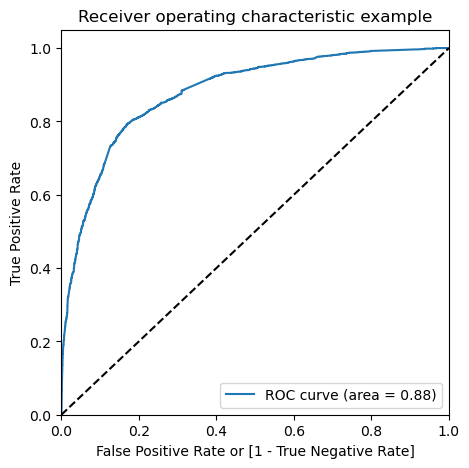

In [166]:
# plotting ROC curve

fpr, tpr, thresholds = metrics.roc_curve( y_train_predicted_final["converted"], y_train_predicted_final["converted_pred"], drop_intermediate = False )
auc_score = metrics.roc_auc_score( y_train_predicted_final["converted"], y_train_predicted_final["converted_pred"] )
plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()




> ROC curve area 0f 0.88 indicates that the model is a good model



In [167]:
y_train_predicted_final['final_predicted'] = y_train_predicted_final['converted_pred'].map( lambda x: 1 if x > 0.345 else 0)

y_train_predicted_final.head()

,converted,converted_pred,Prospect ID,Predicted,final_predicted
0,1,0.971175,2010,1,1
1,0,0.992492,3064,1,1
2,0,0.048755,3989,0,0
3,1,0.298664,4312,0,0
4,0,0.064259,5600,0,0


In [171]:
def logreg_all_metrics(confusion_matrix1):
    TN =confusion_matrix1[0,0]
    TP =confusion_matrix1[1,1]
    FP =confusion_matrix1[0,1]
    FN =confusion_matrix1[1,0]

    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)

    FPR = FP/(FP + TN)
    FNR = FN/(FN +TP)

    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP)

    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))

In [173]:
# finding Confusion metrics for 'y_train_predicted_final' df
confusion_matrix1 = metrics.confusion_matrix(y_train_predicted_final['converted'], y_train_predicted_final['final_predicted'])
print("-----------------------------------------------------------------------","\n")

print("Confusion Matrix1")
print(confusion_matrix1,"\n")

print("-----------------------------------------------------------------------","\n")

# calculating all metrices of the model
logreg_all_metrics(confusion_matrix1)

print("\n")
print("-----------------------------------------------------------------------","\n")

----------------------------------------------------------------------- 

Confusion Matrix1
[[3244  759]
 [ 478 1987]] 

----------------------------------------------------------------------- 

True Negative                    :  3244
True Positive                    :  1987
False Negative                   :  478
False Positve                    :  759
Model Accuracy                   :  0.8088
Model Sensitivity                :  0.8061
Model Specificity                :  0.8104
Model Precision                  :  0.7236
Model Recall                     :  0.8061
Model True Positive Rate (TPR)   :  0.8061
Model False Positive Rate (FPR)  :  0.1896


----------------------------------------------------------------------- 



Choosing optimal Threshold Value

In [174]:
y_train_predicted_final

,converted,converted_pred,Prospect ID,Predicted,final_predicted
0,1,0.971175,2010,1,1
1,0,0.992492,3064,1,1
2,0,0.048755,3989,0,0
3,1,0.298664,4312,0,0
4,0,0.064259,5600,0,0
...,...,...,...,...,...
6463,0,0.223930,8981,0,0
6464,0,0.046677,6400,0,0
6465,1,0.126338,9160,0,0
6466,0,0.017627,1688,0,0


In [175]:
# Let's create columns with different probability cutoffs 
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_predicted_final[i]= y_train_predicted_final.converted_pred.map(lambda x: 1 if x > i else 0)
y_train_predicted_final.head()

,converted,converted_pred,Prospect ID,Predicted,final_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.971175,2010,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.992492,3064,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.048755,3989,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0.298664,4312,0,0,1,1,1,0,0,0,0,0,0,0
4,0,0.064259,5600,0,0,1,0,0,0,0,0,0,0,0,0


In [176]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion_matrix1[1,1] # true positive 
# TN = confusion_matrix1[0,0] # true negatives
# FP = confusion_matrix1[0,1] # false positives
# FN = confusion_matrix1[1,0] # false negatives

numbers = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
    CM1 = metrics.confusion_matrix(y_train_predicted_final.converted, y_train_predicted_final[i] )
    total1=sum(sum(CM1))
    accuracy = (CM1[0,0]+CM1[1,1])/total1
    
    speci = CM1[0,0]/(CM1[0,0]+CM1[0,1])
    sensi = CM1[1,1]/(CM1[1,0]+CM1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381107  1.000000  0.000000
0.1   0.1  0.590136  0.970385  0.355983
0.2   0.2  0.724954  0.923732  0.602548
0.3   0.3  0.790043  0.834077  0.762928
0.4   0.4  0.817718  0.770385  0.846865
0.5   0.5  0.805659  0.657201  0.897077
0.6   0.6  0.794527  0.587424  0.922058
0.7   0.7  0.780458  0.508722  0.947789
0.8   0.8  0.751237  0.400000  0.967524
0.9   0.9  0.706246  0.246247  0.989508


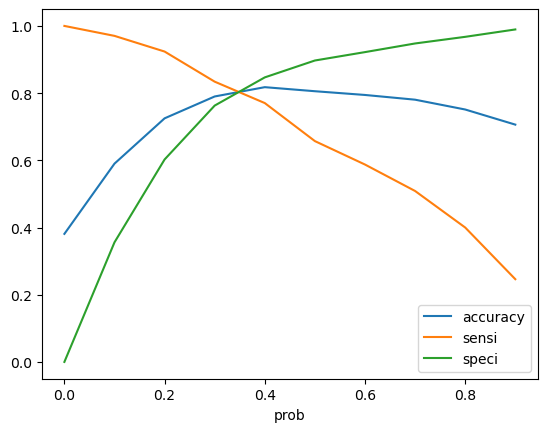

In [177]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [178]:
# adding lead_score

y_train_predicted_final['Lead_Score'] = y_train_predicted_final['converted_pred'].map( lambda x: round(x*100))
y_train_predicted_final.head()

,converted,converted_pred,Prospect ID,Predicted,final_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Lead_Score
0,1,0.971175,2010,1,1,1,1,1,1,1,1,1,1,1,1,97
1,0,0.992492,3064,1,1,1,1,1,1,1,1,1,1,1,1,99
2,0,0.048755,3989,0,0,1,0,0,0,0,0,0,0,0,0,5
3,1,0.298664,4312,0,0,1,1,1,0,0,0,0,0,0,0,30
4,0,0.064259,5600,0,0,1,0,0,0,0,0,0,0,0,0,6


In [179]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 7987 to 4123
Data columns (total 45 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   do_not_email                              2772 non-null   int64  
 1   total_visits                              2772 non-null   float64
 2   time_on_website                           2772 non-null   int64  
 3   page_views_per_visit                      2772 non-null   float64
 4   interview_cheatsheet                      2772 non-null   int64  
 5   lead_origin_landing page submission       2772 non-null   uint8  
 6   lead_origin_lead import                   2772 non-null   uint8  
 7   lead_origin_quick add form                2772 non-null   uint8  
 8   lead_source_google                        2772 non-null   uint8  
 9   lead_source_olark chat                    2772 non-null   uint8  
 10  lead_source_organic search       

In [180]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_columns=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_columns] = scaler.transform(X_test[num_columns])

X_test = X_test[rfe_columns]
X_test.head()

,time_on_website,lead_origin_landing page submission,lead_source_olark chat,lead_source_reference,lead_source_welingak website,last_activity_email bounced,last_activity_email opened,last_activity_olark chat conversation,last_activity_others,last_activity_sms sent,specialization_others
7987,2.009045,1,0,0,0,0,0,0,0,1,0
1061,-0.890572,0,0,1,0,0,0,0,0,1,1
524,-0.658090,1,0,0,0,0,1,0,0,0,0
4340,-0.837485,1,0,0,0,0,1,0,0,0,0
7865,-0.372522,1,0,0,0,0,1,0,0,0,0


In [182]:
# adding contant value
X_test_SM = sm.add_constant(X_test)
X_test_SM.shape

(2772, 12)

In [183]:
bool_columns = X_test_SM.select_dtypes(include='bool').columns.tolist()
 

# Defining the map function
def binary_map(x):
    return x.map({True: 1, False: 0})

# Applying the function to the housing list
X_test_SM[bool_columns] = X_test_SM[bool_columns].apply(binary_map)

In [184]:
# making prediction using model 8 (final model)
y_test_predicted = log_FM8.predict(X_test_SM)

y_test_predicted.head()

7987    0.894241
1061    0.867446
524     0.133908
4340    0.112992
7865    0.173860
dtype: float64

In [185]:
# changing to dataframe of predicted y
y_test_predicted = pd.DataFrame(y_test_predicted)
y_test_predicted.head()

,0
7987,0.894241
1061,0.867446
524,0.133908
4340,0.112992
7865,0.173860


In [186]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,converted
7987,1
1061,1
524,0
4340,0
7865,0


In [187]:
# adding prospect_id column name to index
y_test_df['prospect_id'] = y_test_df.index

# removing index for both dataframes to append them
y_test_predicted.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# appending y_test_df and y_test_pred
y_predicted_final = pd.concat([y_test_df, y_test_predicted],axis=1)
y_predicted_final.head()

,converted,prospect_id,0
0,1,7987,0.894241
1,1,1061,0.867446
2,0,524,0.133908
3,0,4340,0.112992
4,0,7865,0.173860


In [188]:
# renaming the column
y_predicted_final= y_predicted_final.rename(columns={ 0 : 'converted_pred'})

# rearranging the columns
y_predicted_final = y_predicted_final.reindex(['prospect_id','converted','converted_pred'], axis=1)

y_predicted_final.head()

,prospect_id,converted,converted_pred
0,7987,1,0.894241
1,1061,1,0.867446
2,524,0,0.133908
3,4340,0,0.112992
4,7865,0,0.173860


In [189]:
# taking sensitivity-specificity method at 0.348 probability cutoff during training
y_predicted_final['final_predicted'] = y_predicted_final['converted_pred'].map(lambda x: 1 if x > 0.348 else 0)
y_predicted_final.head()

,prospect_id,converted,converted_pred,final_predicted
0,7987,1,0.894241,1
1,1061,1,0.867446,1
2,524,0,0.133908,0
3,4340,0,0.112992,0
4,7865,0,0.173860,0


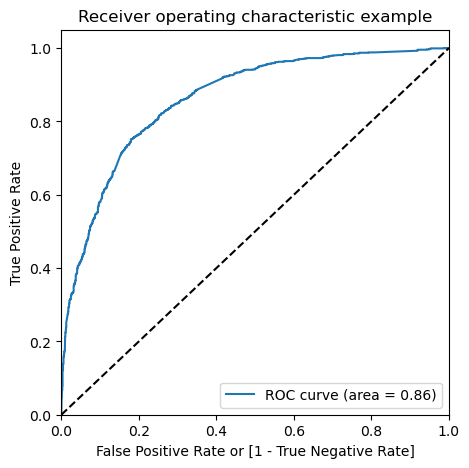

In [190]:
# plotting ROC curve for test set
fpr, tpr, thresholds = metrics.roc_curve(y_predicted_final["converted"], y_predicted_final["converted_pred"], drop_intermediate = False )
auc_score = metrics.roc_auc_score( y_predicted_final["converted"], y_predicted_final["converted_pred"] )
plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

ROC curve are of 0.86 indicates that the predictive model is good

In [192]:
# finding confusion metrics for 'y_test_predicted_final' df
confusion_matrix2 = metrics.confusion_matrix(y_predicted_final['converted'], y_predicted_final['final_predicted'])
print("-----------------------------------------------------------------------","\n")

#
print("Confusion Matrix2")
print(confusion_matrix2,"\n")

print("-----------------------------------------------------------------------","\n")

# calculating all metrices of the model
logreg_all_metrics(confusion_matrix2)

print("\n")
print("-----------------------------------------------------------------------","\n")

----------------------------------------------------------------------- 

Confusion Matrix2
[[1273  403]
 [ 221  875]] 

----------------------------------------------------------------------- 

True Negative                    :  1273
True Positive                    :  875
False Negative                   :  221
False Positve                    :  403
Model Accuracy                   :  0.7749
Model Sensitivity                :  0.7984
Model Specificity                :  0.7595
Model Precision                  :  0.6847
Model Recall                     :  0.7984
Model True Positive Rate (TPR)   :  0.7984
Model False Positive Rate (FPR)  :  0.2405


----------------------------------------------------------------------- 



In [193]:
# features and their coefficicent from final model
parameters=log_FM4.params.sort_values(ascending=False)
parameters

lead_source_welingak website             6.436091
lead_source_reference                    2.942089
last_activity_sms sent                   1.853723
const                                    1.628741
last_activity_others                     1.104635
time_on_website                          1.076222
lead_source_olark chat                   1.071257
last_activity_email opened               0.724204
specialization_hospitality management   -0.710860
last_activity_olark chat conversation   -1.003862
lead_origin_landing page submission     -1.156233
specialization_others                   -1.183235
last_activity_email bounced             -1.252873
occupation_student                      -2.104963
occupation_other                        -2.476132
occupation_unemployed                   -2.525421
dtype: float64

In [194]:
# adding lead_score

y_predicted_final['lead_score'] = y_predicted_final['converted_pred'].map( lambda x: round(x*100))
y_predicted_final.head()

,prospect_id,converted,converted_pred,final_predicted,lead_score
0,7987,1,0.894241,1,89
1,1061,1,0.867446,1,87
2,524,0,0.133908,0,13
3,4340,0,0.112992,0,11
4,7865,0,0.173860,0,17


## Summary

**Train Data Set:**
- Accuracy: 80.88%
- Sensitivity: 80.61%
- Specificity: 81.04%

**Test Data Set:**
- Accuracy: 77.49%
- Sensitivity: 79.84%
- Specificity: 75.95%

The close alignment of these metrics (accuracy, sensitivity and specificity) between the train and test sets indicates the effectiveness of the model.

Furthermore, the achieved sensitivity of approximately 80% aligns with the CEO's target, and the overall accuracy of 80.88% aligns with the study's objectives as well.
